# Travail pratique avec évaluation par les pairs
## Sujet 1 : Concentration de CO2 dans l'atmosphère depuis 1958
### Auteur: William Dethier (william.dethier@univ-grenoble-alpes.fr)

## Consignes:
En 1958, Charles David Keeling  a initié une mesure de la concentration de $CO_2$ dans l'atmosphère à l'observatoire de Mauna Loa, Hawaii, États-Unis qui continue jusqu'à aujourd'hui. L'objectif initial était d'étudier la variation saisonnière, mais l'intérêt s'est déplacé plus tard vers l'étude de la tendance croissante dans le contexte du changement climatique. En honneur à Keeling, ce jeu de données est souvent appelé "Keeling Curve" (voir https://en.wikipedia.org/wiki/Keeling_Curve pour l'histoire et l'importance de ces données).

Les données sont disponibles sur le [site Web de l'institut Scripps](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html). Utilisez le fichier avec les observations hebdomadaires. Attention, ce fichier est mis à jour régulièrement avec de nouvelles observations. Notez donc bien la date du téléchargement, et gardez une copie locale de la version précise que vous analysez. Faites aussi attention aux données manquantes.

Votre mission si vous l'acceptez :
1. Réalisez un graphique qui vous montrera une oscillation périodique superposée à une évolution systématique plus lente.
2. Séparez ces deux phénomènes. Caractérisez l'oscillation périodique. Proposez un modèle simple de la contribution lente, estimez ses paramètres et tentez une extrapolation jusqu'à 2025 (dans le but de pouvoir valider le modèle par des observations futures).
3. Déposer dans FUN votre résultat

## Téléchargement des données:

Nous nous rendons sur le site de l'**institut Scripps** avec l'url donné: https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html.

Sur ce site nous choisissons les données correspondant à celle récoltées depuis 1958 jusqu'aujourd'hui qui sont des données hebdomadaires. Le fichier obtenu à le nom suivant: *weekly_in_situ_co2_mlo.csv*. Les données ont été téléchargées le 10 avril 2020 à 08:38.  

La description des données dans le fichier, indique que le fichier contient deux colonnes indiquant la date et la concentration de $CO_2$ en micro-mol de $CO_2$ par mole (ppm: partie par million (mg/kg); [voir la page *Wikipedia* ](https://www.google.be/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&cad=rja&uact=8&ved=2ahUKEwjCn-T8qN3oAhXKwKQKHW0XAfMQFjACegQICxAF&url=https%3A%2F%2Ffr.wikipedia.org%2Fwiki%2FPartie_par_million&usg=AOvVaw17FszDa5Y_l-nQSsHYMHmC)pour une explication détaillée ).

## Pré-traitement des données:



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Après inspection visuelle, les premières lignes du fichier CSV sont un commentaire, que nous ignorons en précisant **skiprows=43**.

**Attention: nous avons modifié le fichier source en ajoutant simplement le nom des colonnes afin de ne pas avoir une partie du commentaire dans l'affichage et afin que ce soit plus clair. Cela ne change rien aux données. Nous avons écrit une ligne entre la fin du commentaire et le début des données comme suit: Date, Concentration .
Nous utilisons donc un fichier nommé *weekly_in_situ_co2_mlomodified.csv* comprenant la modification, mais afin d'avoir les données originales, le fichier source *weekly_in_situ_co2_mlo.csv* est tout de même gardé dans le répertoire sur GitLab.**

Ensuite, nous affichons les données brutes.

In [2]:
data_from_site=open("weekly_in_situ_co2_mlomodified.csv")
#data_from_site=open("weekly_in_situ_co2_mlo.csv")

raw_data = pd.read_csv(data_from_site, skiprows=44)
raw_data

Date  Concentration
0     1958-03-29         316.19
1     1958-04-05         317.31
2     1958-04-12         317.69
3     1958-04-19         317.58
4     1958-04-26         316.48
5     1958-05-03         316.95
6     1958-05-17         317.56
7     1958-05-24         317.99
8     1958-07-05         315.85
9     1958-07-12         315.85
10    1958-07-19         315.46
11    1958-07-26         315.59
12    1958-08-02         315.64
13    1958-08-09         315.10
14    1958-08-16         315.09
15    1958-08-30         314.14
16    1958-09-06         313.54
17    1958-11-08         313.05
18    1958-11-15         313.26
19    1958-11-22         313.57
20    1958-11-29         314.01
21    1958-12-06         314.56
22    1958-12-13         314.41
23    1958-12-20         314.77
24    1958-12-27         315.21
25    1959-01-03         315.24
26    1959-01-10         315.50
27    1959-01-17         315.69
28    1959-01-24         315.86
29    1959-01-31         315.42
...          ...            ...
3126  2019-07-06         412.69
3127  2019-07-13         412.30
3128  2019-07-20         411.76
3129  2019-07-27         410.32
3130  2019-08-03         410.50
3131  2019-08-10         410.48
3132  2019-08-17         410.05
3133  2019-08-24         409.52
3134  2019-08-31         409.32
3135  2019-09-07         408.80
3136  2019-09-14         408.61
3137  2019-09-21         408.50
3138  2019-09-28         408.28
3139  2019-10-05         407.99
3140  2019-10-12         408.61
3141  2019-10-19         408.77
3142  2019-10-26         408.68
3143  2019-11-02         409.86
3144  2019-11-09         410.15
3145  2019-11-16         410.22
3146  2019-11-23         410.48
3147  2019-11-30         410.92
3148  2019-12-07         411.27
3149  2019-12-14         411.67
3150  2019-12-21         412.30
3151  2019-12-28         412.59
3152  2020-01-04         413.19
3153  2020-01-11         413.39
3154  2020-01-25         413.36
3155  2020-02-01         413.99

[3156 rows x 2 columns]

Y a-t-il des points manquants dans ce jeux de données ? Après une inspection visuelle on vérifie avec la ligne suivante.

In [3]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, Concentration]
Index: []

Pas de données manquante, on continue l'analyse.

On vérifie le type des données:

In [4]:
print(type(raw_data["Date"][0]),type(raw_data["Concentration"][0]))

<class 'str'> <class 'numpy.float64'>


La concentration est donc bien un nombre on doit pas changer. Les dates sont des chaînes de caractère, on doit donc traiter pour avoir des nombres.

In [14]:
raw_data["Date"][3155]

'2020-02-01'

In [32]:
from datetime import datetime

def convert_week(year_and_week_str):
    datetime_object = datetime.strptime(year_and_week_str, '%y/%m/%d')
    return datetime_object

raw_data['period'] = [convert_week(yw) for yw in raw_data['Date']]
print(raw_data)

#def convert_week(year_and_week_int):
    #year_and_week_str = str(year_and_week_int)
 #   datestr=year_and_week_int[:4]+year_and_week_int[5:7]+year_and_week_int[8:]
  #  dateint=int(datestr)
   # return dateint
    #year = int(year_and_week_int[:4])
    #week = int(year_and_week_int[5:7])
    #w = isoweek.Week(year, week)
    #return pd.Period(w.day(0), 'W')

#raw_data['period'] = [convert_week(yw) for yw in raw_data['Date']]
#print(raw_data)

ValueError: time data '1958-03-29' does not match format '%y/%m/%d'

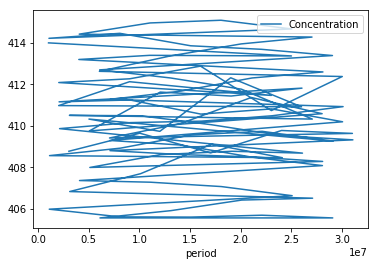

In [30]:
raw_data[-100:].plot("period","Concentration")

In [23]:
 sorted_data = raw_data.set_index('period').sort_index()

In [24]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1958-01-27/1958-02-02 1958-02-10/1958-02-16
1958-02-24/1958-03-02 1958-03-10/1958-03-16
1958-03-17/1958-03-23 1958-12-29/1959-01-04
1959-03-16/1959-03-22 1960-01-04/1960-01-10
1960-03-21/1960-03-27 1961-01-02/1961-01-08
1961-03-20/1961-03-26 1962-01-01/1962-01-07
1962-03-19/1962-03-25 1962-12-31/1963-01-06
1963-03-18/1963-03-24 1963-12-30/1964-01-05
1963-12-30/1964-01-05 1964-01-27/1964-02-02
1964-03-16/1964-03-22 1965-01-04/1965-01-10
1965-03-22/1965-03-28 1966-01-03/1966-01-09
1966-03-21/1966-03-27 1967-01-02/1967-01-08
1967-03-20/1967-03-26 1968-01-01/1968-01-07
1968-03-18/1968-03-24 1968-12-30/1969-01-05
1969-03-17/1969-03-23 1969-12-29/1970-01-04
1970-03-16/1970-03-22 1971-01-04/1971-01-10
1971-03-22/1971-03-28 1972-01-03/1972-01-09
1972-03-20/1972-03-26 1973-01-01/1973-01-07
1973-03-19/1973-03-25 1973-12-31/1974-01-06
1974-03-18/1974-03-24 1974-12-30/1975-01-05
1975-03-17/1975-03-23 1975-12-29/1976-01-04
1976-03-15/1976-03-21 1977-01-03/1977-01-09
1977-03-21/1977-03-27 1978-01-02